In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier


import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

import time

In [3]:
#KMeans helps identify clusters it is a machine learning algorithm
#K idenitfys how many clusters
#centorids are k amount of random points
#centroids are use to determine which points are closer to which centroid to identify clusters

#After that you put centroid in center of both clusters and repeat the same process
#you keep repeating the process untill none of the data points change the cluster


#How to determine how many clusters: You choose the best possible K number and you start with some K there is an algorithm called the elbow method to determine WATCH VIDEO LINKED TO REFER

In [2]:
df = pd.read_csv('covid-death-data.csv')
df.head()

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_deaths_per_500k,covid-19_community_level,date_updated
0,Lincoln County,55069,Wisconsin,"27,593",282,"Marathon (Wausau), WI - Wood, WI","291,401",4.7,13.4,177.58,Medium,8/18/2022
1,Manitowoc County,55071,Wisconsin,"78,981",355,"Sheboygan (Sheboygan), WI - Manitowoc, WI","244,410",3.4,9.8,169.66,Low,8/18/2022
2,Marathon County,55073,Wisconsin,"135,692",282,"Marathon (Wausau), WI - Wood, WI","291,401",4.7,13.4,209.3,High,8/18/2022
3,Monroe County,55081,Wisconsin,"46,253",290,"La Crosse (La Crosse), WI - Monroe, WI","257,027",3.9,15.6,216.2,High,8/18/2022
4,Portage County,55097,Wisconsin,"70,772",400,"Portage, WI","70,772",5.9,7.1,217.6,Medium,8/18/2022


In [3]:
newdf = df.fillna(0)
newdf.head()
newdf['covid_deaths_per_500k'] = newdf['covid_deaths_per_500k'].str.replace(',','').astype(float)
newdf.loc[741]
newdf['covid_deaths_per_500k'] = newdf['covid_deaths_per_500k'].astype(float)
newdf['covid_inpatient_bed_utilization'] = newdf['covid_inpatient_bed_utilization'].astype(float)

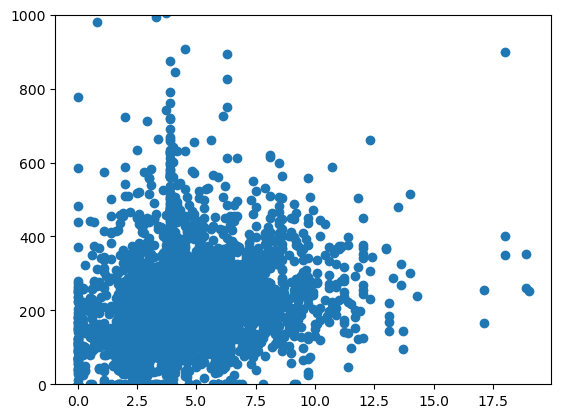

In [4]:
x = newdf['covid_inpatient_bed_utilization']
y = newdf['covid_deaths_per_500k']

plt.scatter(x, y)
plt.ylim(0, 1000)
plt.show()

In [5]:
km = KMeans(n_clusters=6)
predictedY = km.fit_predict(newdf[['covid_inpatient_bed_utilization','covid_deaths_per_500k']])
predictedY

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [6]:
newdf['cluster'] = predictedY
newdf.head()

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_deaths_per_500k,covid-19_community_level,date_updated,cluster
0,Lincoln County,55069,Wisconsin,"27,593",282,"Marathon (Wausau), WI - Wood, WI","291,401",4.7,13.4,177.58,Medium,8/18/2022,0
1,Manitowoc County,55071,Wisconsin,"78,981",355,"Sheboygan (Sheboygan), WI - Manitowoc, WI","244,410",3.4,9.8,169.66,Low,8/18/2022,0
2,Marathon County,55073,Wisconsin,"135,692",282,"Marathon (Wausau), WI - Wood, WI","291,401",4.7,13.4,209.30,High,8/18/2022,0
3,Monroe County,55081,Wisconsin,"46,253",290,"La Crosse (La Crosse), WI - Monroe, WI","257,027",3.9,15.6,216.20,High,8/18/2022,0
4,Portage County,55097,Wisconsin,"70,772",400,"Portage, WI","70,772",5.9,7.1,217.60,Medium,8/18/2022,0


Text(0, 0.5, 'Covid Deaths Per 500k')

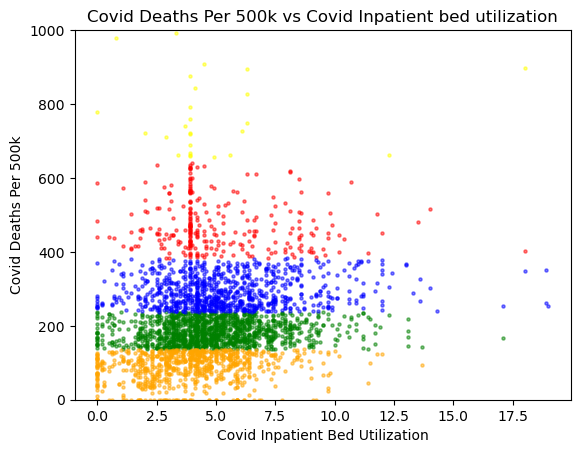

In [7]:
df1 = newdf[newdf.cluster==0]
df2 = newdf[newdf.cluster==1]
df3 = newdf[newdf.cluster==2]

df4 = newdf[newdf.cluster==3]
df5 = newdf[newdf.cluster==4]
df6 = newdf[newdf.cluster==5]



plt.scatter(df1['covid_inpatient_bed_utilization'], df1['covid_deaths_per_500k'], color = 'green',s=5,alpha=0.5)
plt.scatter(df2['covid_inpatient_bed_utilization'], df2['covid_deaths_per_500k'], color = 'red',s=5,alpha=0.5)
plt.scatter(df3['covid_inpatient_bed_utilization'], df3['covid_deaths_per_500k'], color = 'black',s=5,alpha=0.5)

plt.scatter(df4['covid_inpatient_bed_utilization'], df4['covid_deaths_per_500k'], color = 'blue',s=5,alpha=0.5)
plt.scatter(df5['covid_inpatient_bed_utilization'], df5['covid_deaths_per_500k'], color = 'orange',s=5,alpha=0.5)
plt.scatter(df6['covid_inpatient_bed_utilization'], df6['covid_deaths_per_500k'], color = 'yellow',s=5,alpha=0.5)
plt.ylim(0, 1000)

plt.title("Covid Deaths Per 500k vs Covid Inpatient bed utilization") 
plt.xlabel("Covid Inpatient Bed Utilization")
plt.ylabel("Covid Deaths Per 500k")



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

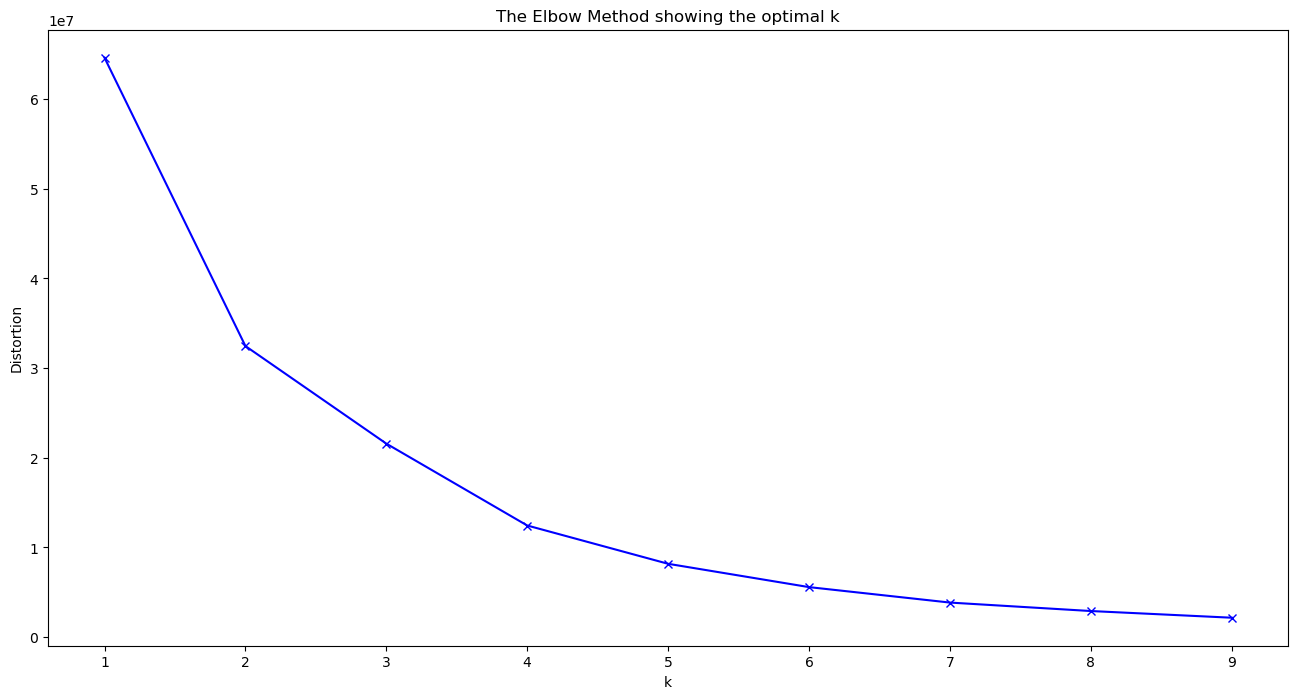

In [8]:


newdf2 = newdf[['covid_inpatient_bed_utilization', 'covid_deaths_per_500k']] 
newdf2.head()

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(newdf2)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Execution time: 0.06821346282958984 seconds


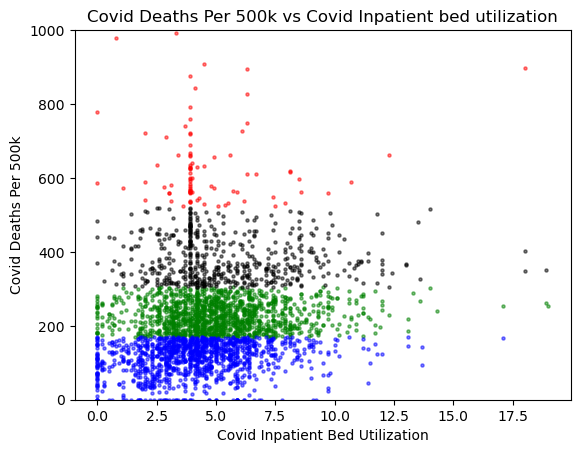

In [10]:
st = time.time()

km = KMeans(n_clusters=5)
predictedY = km.fit_predict(newdf[['covid_inpatient_bed_utilization','covid_deaths_per_500k']])
predictedY

newdf['cluster'] = predictedY

df1 = newdf[newdf.cluster==0]
df2 = newdf[newdf.cluster==1]
df3 = newdf[newdf.cluster==2]
df4 = newdf[newdf.cluster==3]




plt.scatter(df1['covid_inpatient_bed_utilization'], df1['covid_deaths_per_500k'], color = 'green',s=5,alpha=0.5)
plt.scatter(df2['covid_inpatient_bed_utilization'], df2['covid_deaths_per_500k'], color = 'red',s=5,alpha=0.5)
plt.scatter(df3['covid_inpatient_bed_utilization'], df3['covid_deaths_per_500k'], color = 'black',s=5,alpha=0.5)
plt.scatter(df4['covid_inpatient_bed_utilization'], df4['covid_deaths_per_500k'], color = 'blue',s=5,alpha=0.5)

plt.ylim(0, 1000)

plt.title("Covid Deaths Per 500k vs Covid Inpatient bed utilization") 
plt.xlabel("Covid Inpatient Bed Utilization")
plt.ylabel("Covid Deaths Per 500k")

et = time.time()

elapsed_time = et - st

print('Execution time:', elapsed_time, 'seconds')


In [42]:
newdf.to_csv('COVIDDataScrubbed.csv')